<a href="https://colab.research.google.com/github/folga67/Machine_learning/blob/master/Course_work_less3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
#normalizing data
from sklearn.preprocessing import StandardScaler
#pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

In [5]:
## https://www.kaggle.com/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv
## Context
## "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

## Content
## The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription,
## will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

## The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80)
## for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

In [442]:
data = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Capstone_project/churn-bigml-80.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [443]:
data_test = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Capstone_project/churn-bigml-20.csv')
data_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


check missing values and data type


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [339]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


There are no missing and negative outliers in data. Data contains 2666 rows and 20 columns. The columns Churn  is Target. Let check balance of classes in data

In [340]:
data.iloc[:,-1].value_counts(normalize = True), data_test.iloc[:,-1].value_counts(normalize = True)

(False    0.854464
 True     0.145536
 Name: Churn, dtype: float64, False    0.857571
 True     0.142429
 Name: Churn, dtype: float64)

Data contains unbalanced classes. This feature of data demands to apply cross_validation during validation of models.
Data and test datasets contains the similare shares of positive and negative classes. It makes us sure, that we are able to value model by suggested test dataset.
Have a look at distribution of features in data.



In [341]:
features = data.columns.tolist()[:-1]
target = data.columns.tolist()[-1]

In [342]:
## check features: frequency
def nom_plot(nom_col):
    nom_data=data[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.figure(figsize = (20,4))
    plt.title(nom_col)
    plt.bar(nom_data_counts.index,nom_data_counts)
    ##print('{}:\n{}'.format(nom_col,nom_data_counts))
    #print('{}:\n{}'.format(nom_col,nom_data_counts/len(data.index)))
    plt.show()

In [343]:
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
numeric_data = data[numeric_columns]

Histogram for Numerical Variables


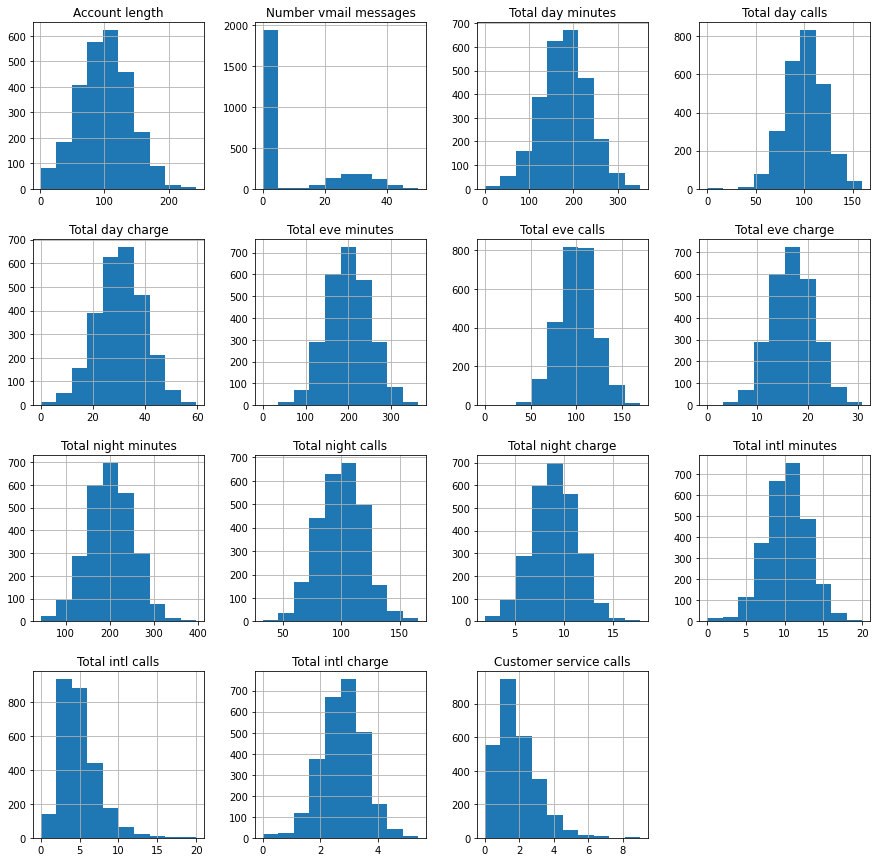

In [344]:
print ("Histogram for Numerical Variables")
plots = numeric_data.hist(figsize=(15,15))

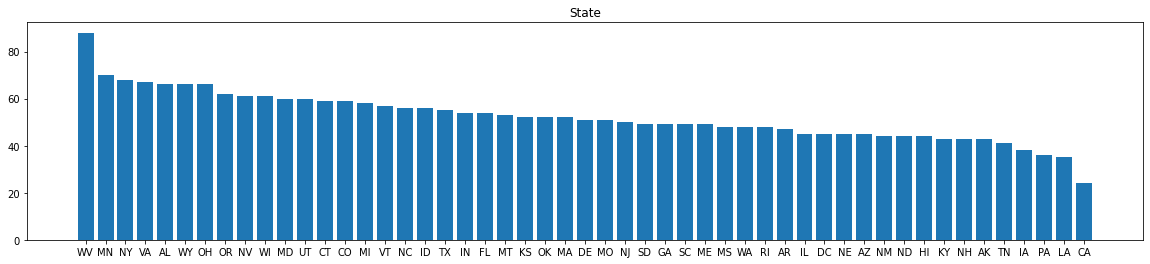

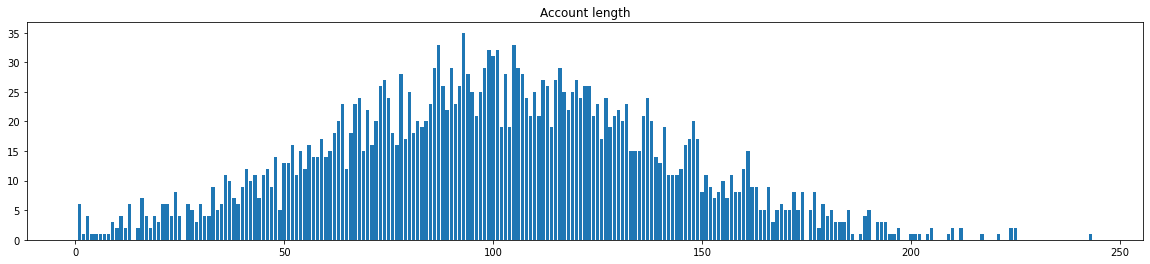

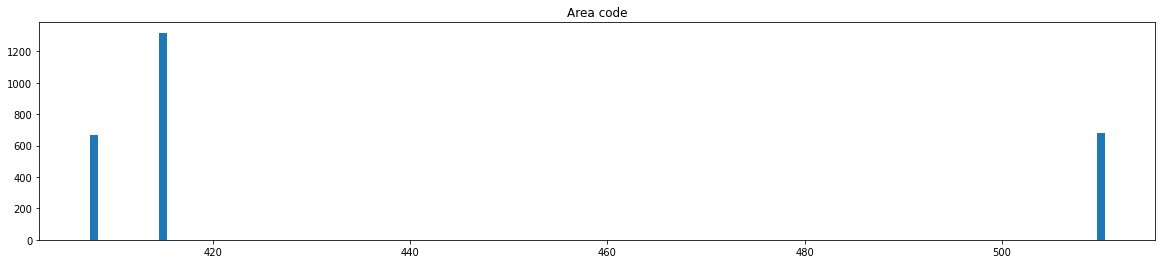

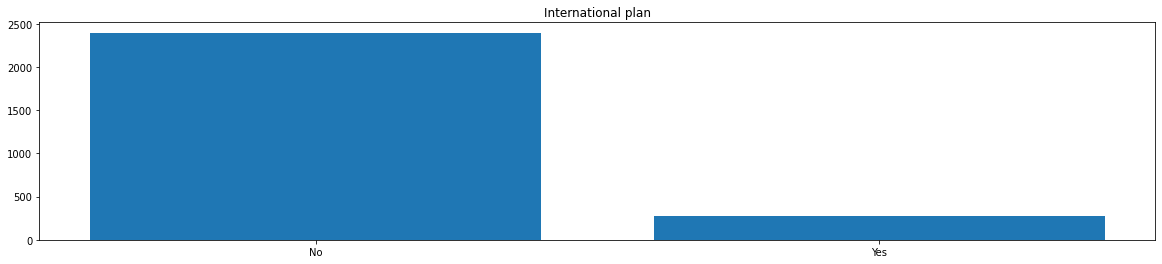

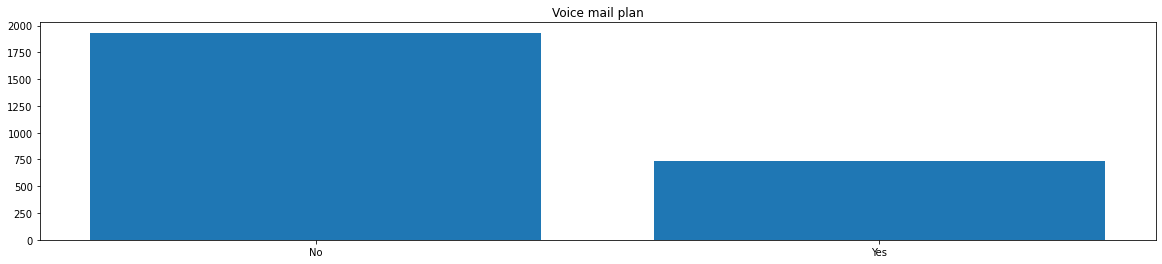

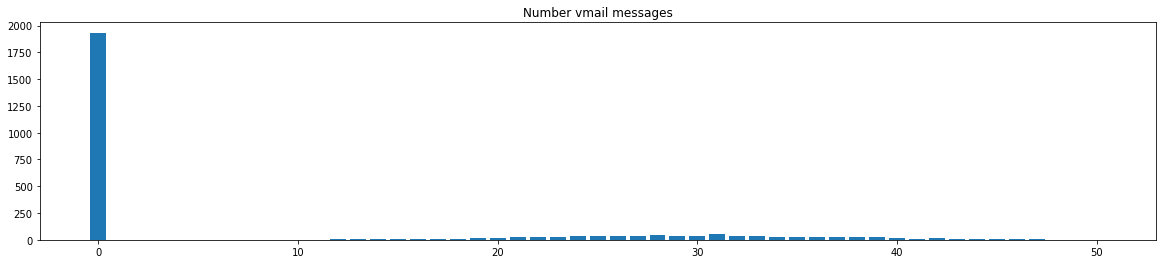

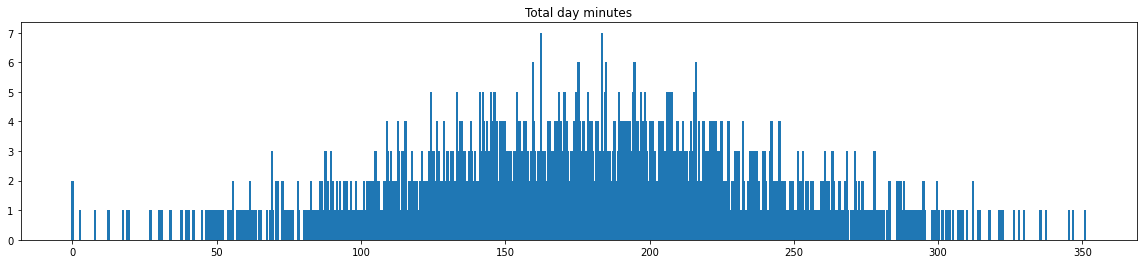

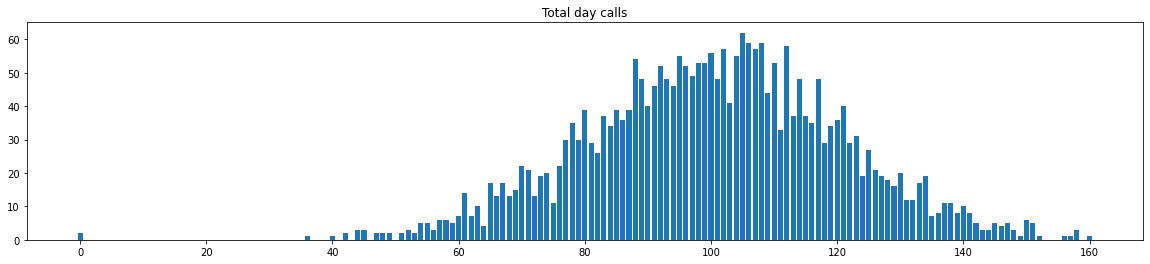

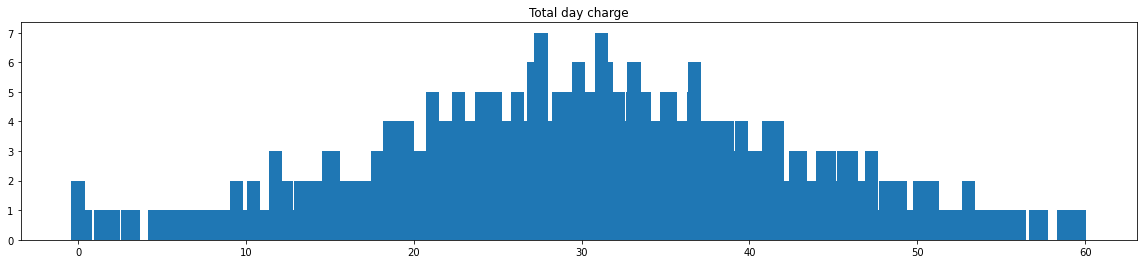

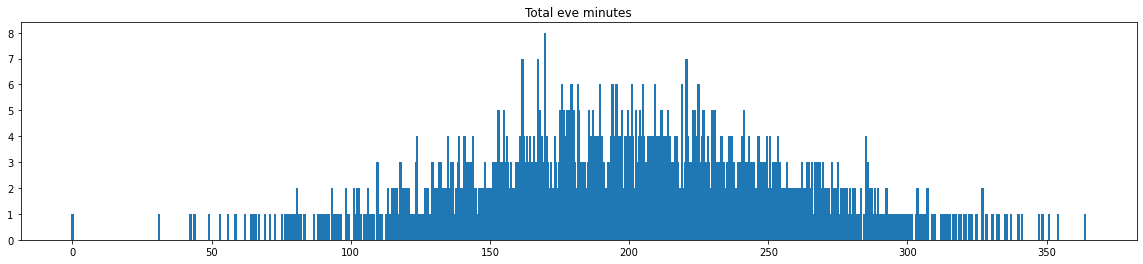

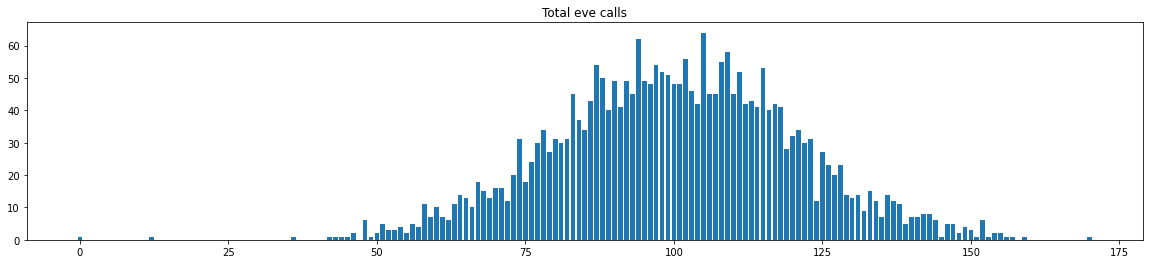

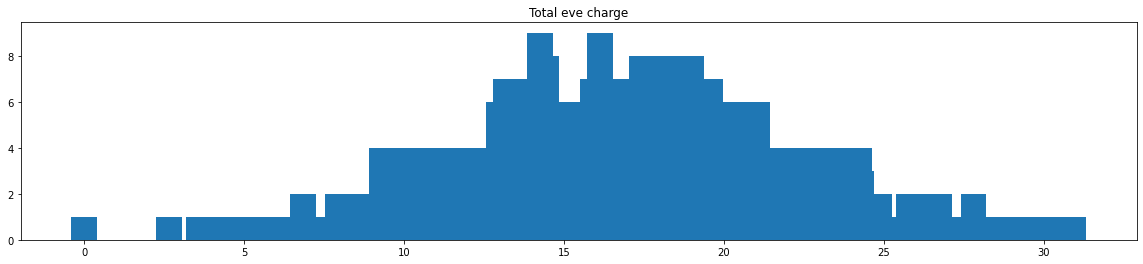

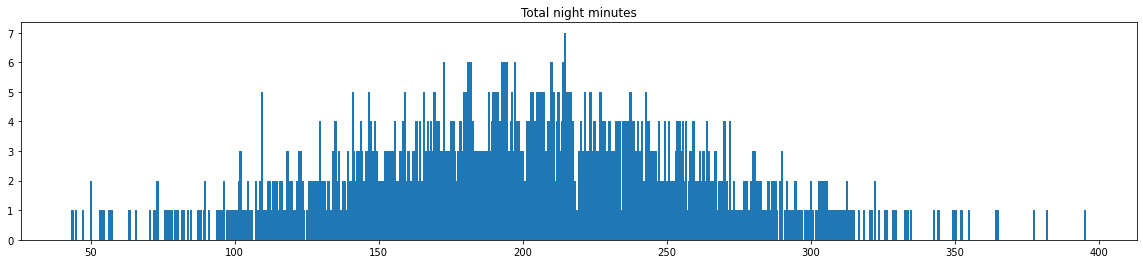

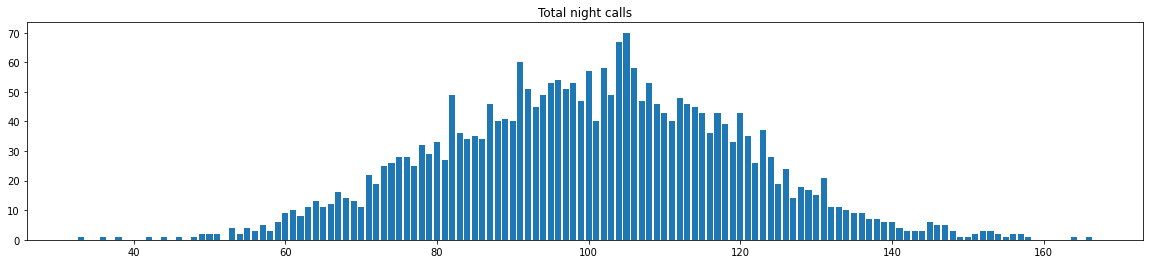

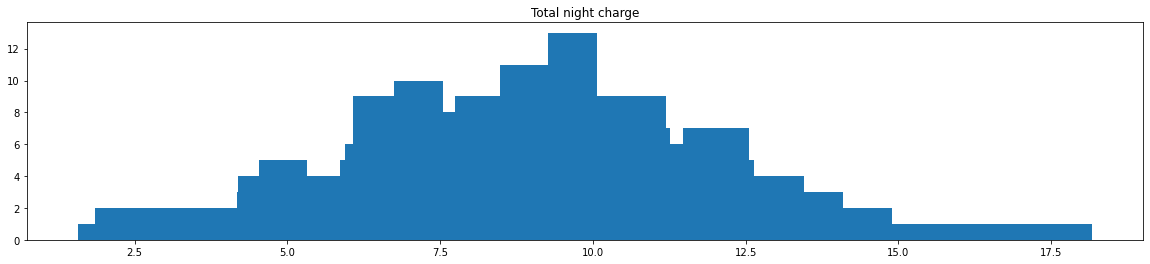

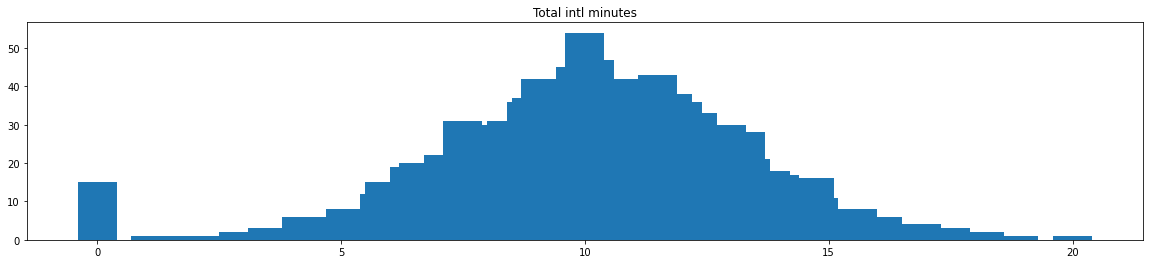

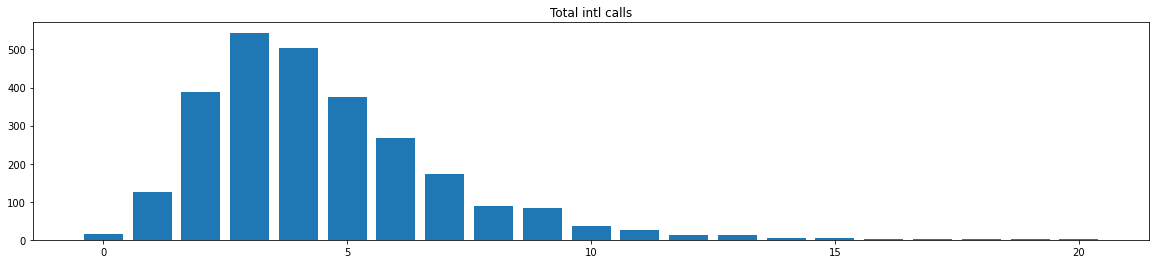

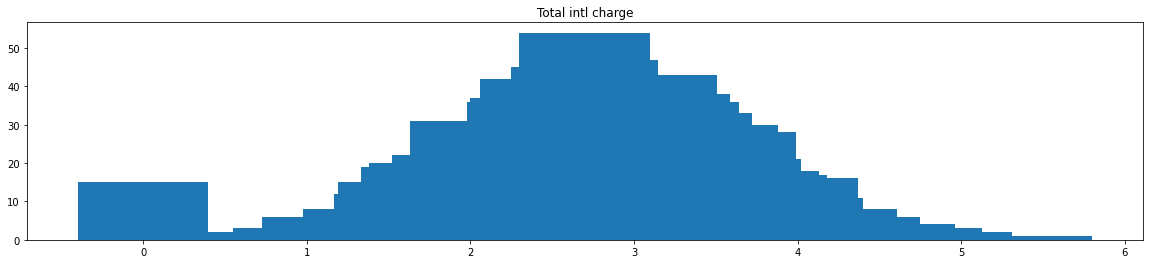

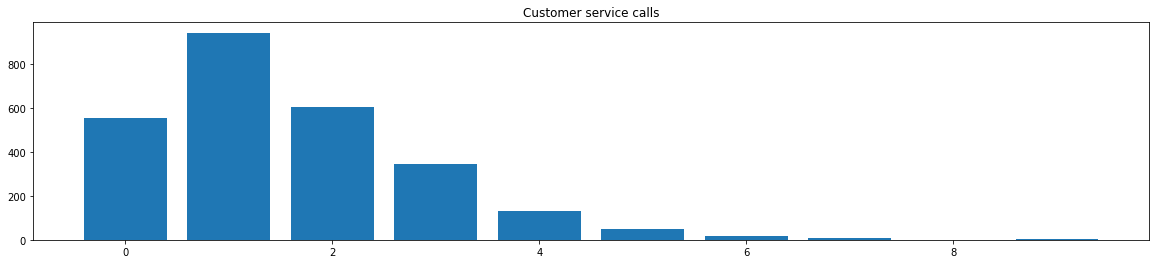

In [345]:
for i in features:
    nom_plot(i)

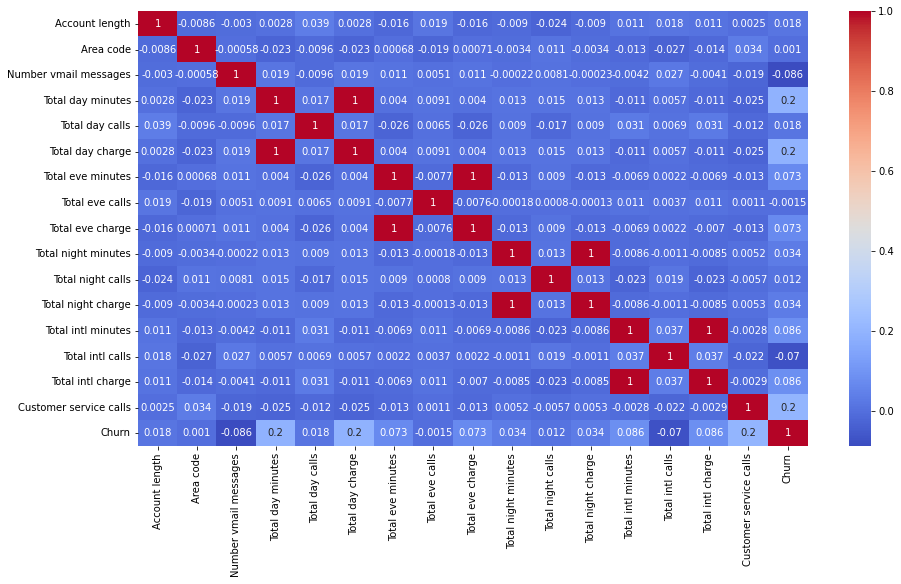

In [346]:
corr = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

Observation:
With regard to the heatmap we can see high correlation bettween the following variables:
With respect to churn:-
- Total day minutes to Churn at 0.2
- Total day charge to Churn at 0.2
- Customer service calls to Churn at 0.2


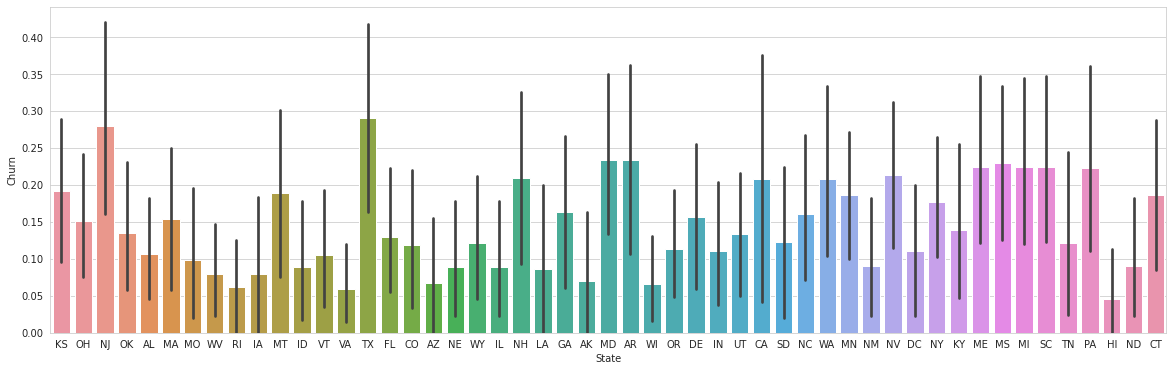

In [347]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=data)

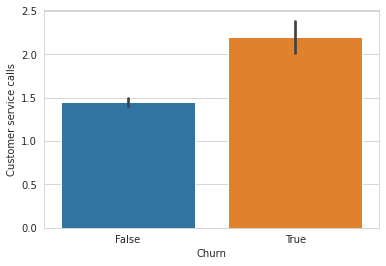

In [348]:
sns.barplot(x='Churn', y='Customer service calls',data=data)

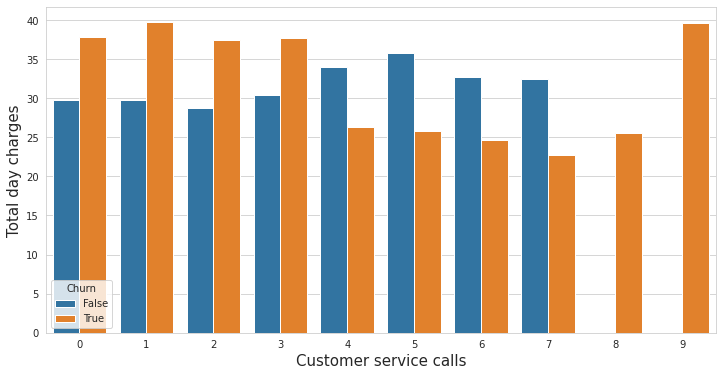

In [349]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(12,6))
sns.barplot(data = data, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()

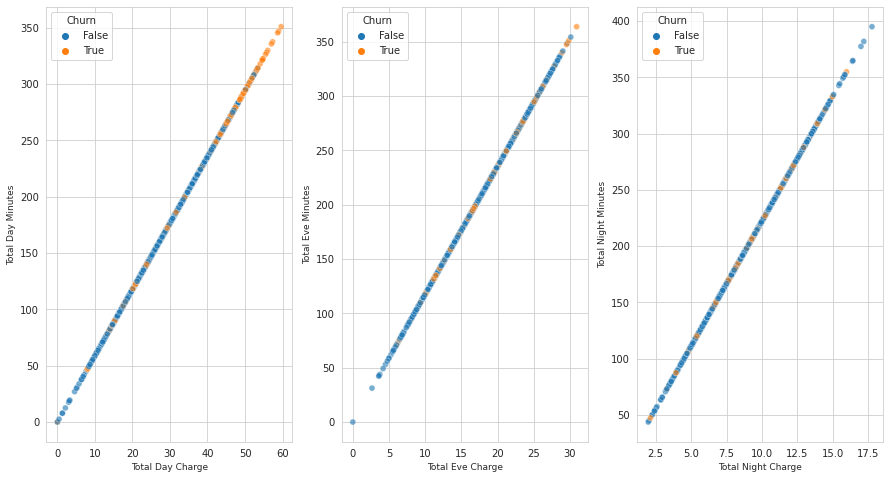

In [350]:
# How does time of minutes spoken relate to the Churn rate
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = data, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = data, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = data, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

Inference:
- We can observe from the three scatterplots that the churn rate is maximum times True in the Day.
- In the evening and night we can see that the churn rate is not so relevant.

In [351]:
# Creating a new dataframe dftotal:
dftotal = pd.DataFrame(data['Churn'])
#Creating three columns for total minutes, total calls and total charges
dftotal['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes']
dftotal['Total calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls']
dftotal['Total charges'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']
dftotal['Avg_time_calls'] = dftotal['Total minutes']/dftotal['Total calls']
dftotal['Avg_charges_calls'] = dftotal['Total charges']/dftotal['Total calls']


In [352]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges,Avg_time_calls,Avg_charges_calls
0,False,707.2,300,72.86,2.357333,0.242867
1,False,611.5,329,55.54,1.858663,0.168815
2,False,527.2,328,59.00,1.607317,0.179878
3,False,558.2,248,65.02,2.250806,0.262177
4,False,501.9,356,49.36,1.409831,0.138652


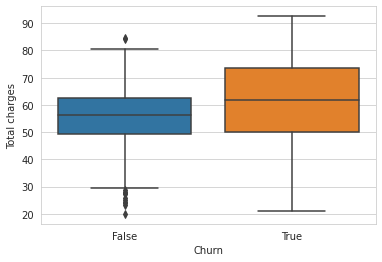

In [353]:
sns.boxplot(x='Churn',y='Total charges', data = dftotal)

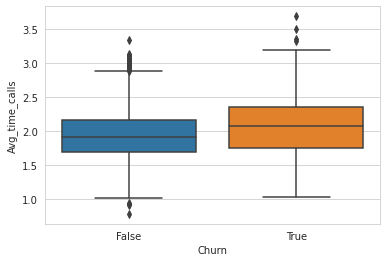

In [354]:
sns.boxplot(x='Churn',y='Avg_time_calls', data = dftotal)

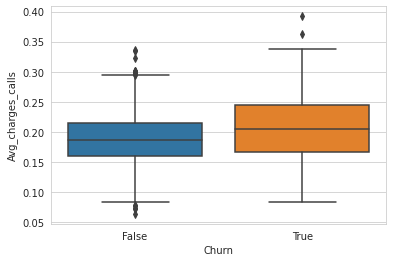

In [355]:
sns.boxplot(x='Churn',y='Avg_charges_calls', data = dftotal)

Inference:
- Churned customers had higher charges to pay than remaining customers
- Churned customers had longer time per call than remaining customers
- Churned customers had higher charges per call than remaining customers

##Data preparing

In [444]:
data_copy = data.copy()
data_copy.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [120]:
##X = data_copy[features].drop(['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'], axis =1)
##y = data_copy[target]

Label encoding


In [445]:
intl_plan = {"International plan":{"No": 0, "Yes": 1}}
vm_plan = {"Voice mail plan":{"No": 0, "Yes": 1}}
data_copy = data_copy.replace(intl_plan)
data_copy = data_copy.replace(vm_plan)

In [446]:
test_copy = data_test.copy()
test_copy = test_copy.replace(intl_plan)
test_copy = test_copy.replace(vm_plan)

In [447]:
X = data_copy[features]
y = data_copy[target]

In [448]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

Building pipeline:

In [449]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0                
        return X[self.columns]

In [450]:
## to define the categories for pipeline
##cat_cols = X_train.select_dtypes(include=[object]).columns
cat_cols =['State', 'Area code']
label_cols = ['International plan', 'Voice mail plan']
continuos_cols = X_train.columns.drop(X_train[cat_cols])
continuos_cols = continuos_cols.drop(X_train[label_cols])

In [451]:
continuos_cols, cat_cols

(Index(['Account length', 'Number vmail messages', 'Total day minutes',
        'Total day calls', 'Total day charge', 'Total eve minutes',
        'Total eve calls', 'Total eve charge', 'Total night minutes',
        'Total night calls', 'Total night charge', 'Total intl minutes',
        'Total intl calls', 'Total intl charge', 'Customer service calls'],
       dtype='object'), ['State', 'Area code'])

In [452]:
## feature engineering
continuos_transformers = []
cat_transformers = []
label_transformers = []

for cont_col in continuos_cols:
    transfomer =  Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('standard', StandardScaler())
            ])
    continuos_transformers.append((cont_col, transfomer))
    
for cat_col in cat_cols:
    cat_transformer = Pipeline([
                ('selector', ColumnSelector(key=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    cat_transformers.append((cat_col, cat_transformer))
    
for label_col in label_cols:
    label_transformer = Pipeline([
                ('selector', NumberSelector(key=label_col))
            ])
    label_transformers.append((label_col, label_transformer))

In [453]:
feats = FeatureUnion(continuos_transformers+cat_transformers+label_transformers)

In [454]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
results = []
names = []
for name, model in models:
  classifier = Pipeline([
    ('features',feats),
    ('classifier', model)])
  cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')
  names.append(name)
  results.append(cv_scores)
for i in range(len(names)):
  print(names[i],results[i].mean())

LR 0.8049204216309832
LDA 0.7988747051270566
KNN 0.7417651318343337
CART 0.8144808743169399
RF 0.905182000059721
NB 0.6347024396070351
SVM 0.8881026605751143
XGB 0.9081083340798471
GBR 0.9028051771928605


In [455]:
classifier = Pipeline([
    ('features',feats),
    ('classifier', XGBClassifier(max_depth=9,
                                 learning_rate=0.05,
                                 colsample_bytree = 0.8
                                 ))
])


cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')

In [456]:
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

CV score is 0.9065196034518797


In [457]:
## value valid data XGBClass
model = classifier.fit(X_train, y_train)
y_pred_XGB = model.predict(X_val)

In [458]:
def evaluate_results(y_test, y_score):
    print('Classification results:')
    f1 = f1_score(y_test, y_score)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_score)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_score, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_score, average='binary')
    print("precision: %.2f%%" % (prc * 100.0))    

In [459]:
XGBClass_ = evaluate_results(y_val, y_pred_XGB)

Classification results:
f1: 84.66%
roc: 89.22%
recall: 80.23%
precision: 89.61%


Inference:
Model XGBClassifier show the best roc_auc score, and prove, that this model offer the maximal related precision and recall

Prediction on data test

In [462]:
X = test_copy.drop('Churn', axis =1)
y = test_copy['Churn']

In [463]:
y_pred_test = model.predict(X)

In [464]:
XGBClass_test = evaluate_results(y, y_pred_test)

Classification results:
f1: 82.35%
roc: 86.41%
recall: 73.68%
precision: 93.33%


## Preparing data without pipeline for tuning and evaluate importance of features

In [418]:
data_copy.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [419]:
data=pd.concat([data_copy, pd.get_dummies(data_copy['State'])], axis=1)
data=pd.concat([data, pd.get_dummies(data['Area code'])], axis=1)
data= data.drop(data[cat_cols], axis = 1)

In [420]:
data[continuos_cols] = StandardScaler().fit_transform(data[continuos_cols])

In [421]:
data.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,408,415,510
0,0.692163,0,1,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.161278,0,1,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.919686,0,0,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.420168,1,0,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.647691,1,0,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [422]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']

In [423]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8, random_state=0)

In [424]:
model = XGBClassifier(max_depth=9, learning_rate=0.05, colsample_bytree = 0.7)
#обучим на тренировочном датасете
clf = model.fit(X_train, y_train)
##clf = model.fit(X_train, y_train.iloc[:,-1:].values.ravel())
y_score = clf.predict(X_val)

# Classification results:
# f1: 84.30%
# roc: 86.85%
# recall: 73.91%
# precision: 98.08%

#  0.8
# Classification results:
# f1: 84.55%
# roc: 87.47%
# recall: 75.36%
# precision: 96.30%

#0.7
# Classification results:
# f1: 85.25%
# roc: 87.57%
# recall: 75.36%
# precision: 98.11%



In [425]:
XGBClass_ = evaluate_results(y_val, y_score)

Classification results:
f1: 82.64%
roc: 86.02%
recall: 72.46%
precision: 96.15%


Have a look at importance of features for XGBoostClass

In [426]:
clf_features = pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
clf_features

,feature,importance
1,Total day minutes,759
4,Total eve minutes,561
27,Total night minutes,436
7,Total intl minutes,318
19,Total night calls,309
3,Account length,296
14,Total day calls,273
5,Total eve calls,237
29,Total eve charge,219
6,Total intl calls,197


In [300]:
pip install shap

In [427]:
import shap

# load JS visualization code to notebook
shap.initjs()

model = xgb.train( {'max_depth':9,
                    'learning_rate': 0.05,
                    'colsample_bytree': 0.8
                    }, 
                      xgb.DMatrix(X_train, label=y_train), 100)

# строим модель объЯсненияе в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# покажем объяснение первого примера (берем matplotlib=True для обхода Javascript)
shap.initjs() # для работы в колаборатории 
shap.force_plot(explainer.expected_value, shap_values[100,:], X_train.iloc[100,:])

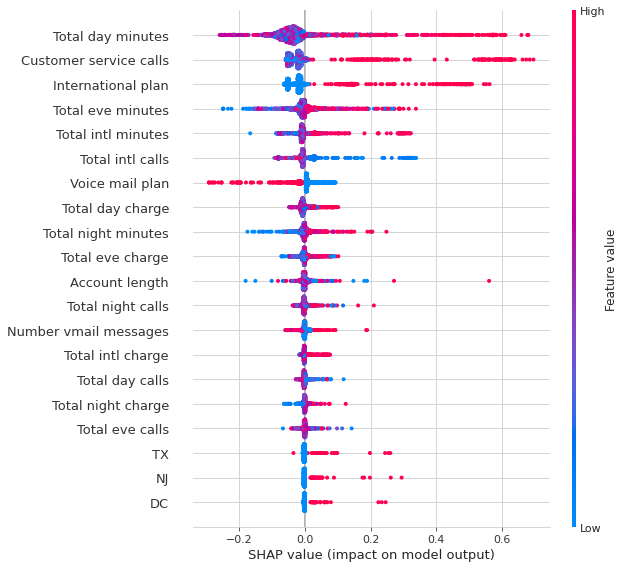

In [428]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

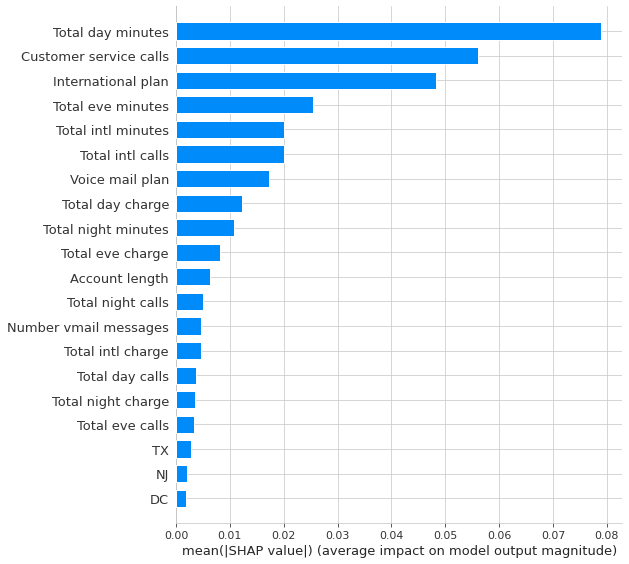

In [429]:
shap.summary_plot(shap_values, X_train, plot_type="bar")